#Motivation Of Paper
1. **Exploring Smaller LMs' Capabilities**: The paper aims to investigate how well smaller language models (like 1M-28M parameters with 8 layers) can generate coherent and fluent English text.
The objective is to assess if these smaller models possess reasoning abilities, knowledge of general facts, and can follow instructions effectively.

2. **Introducing the TinyStories Dataset**: The authors introduce TinyStories, a dataset consisting of short stories generated by GPT-3.5 and GPT-4, which use vocabulary comprehensible to 3 to 4-year-old children.By utilizing the TinyStories dataset, the paper seeks to determine the minimal requirements necessary for language models to produce coherent text.

#Dataset Creation


*   They designed a synthetic dataset using GPT3.5 and 4 that preserves the essential elements
of natural language, such as grammar, vocabulary, facts, and reasoning, but that is much smaller and more refined in terms of its breadth and diversity.
*   Diverse Vocabulary Selection: The dataset is designed to be diverse by consisting of approximately 1500 basic words, resembling the vocabulary of a typical 3-4 year-old child. These words are categorized into nouns, verbs, and adjectives. In each story generation, three words (a verb, a noun, and an adjective) are randomly selected.
*   Forced Story Diversity: In each story generation, the model is instructed to randomly select three words (one verb, one noun, and one adjective) and create a story that incorporates these words. This approach significantly increases dataset diversity by compelling stories to cover the entire child's vocabulary and explore various ways to combine different concepts. Additionally, a list of potential story features was constructed, including elements like dialogues, plot twists, endings, and moral values. Random subsets of these features were added to each story, further enhancing diversity and complexity​.

  Here is a sample generation, including the prompt and the story generated by GPT-3.5.<br>
 **Write a short story (3-5 paragraphs) which only uses very simple words that a 3 year old child would likely understand. The story should use the verb ”decorate”, the noun ”thunder” and the adjective ”ancient”. The story
should have the following features: the story should contain at least one dialogue, the story has a bad ending.
Remember to only use simple words!** <br>
Once upon a time, in an ancient house, there lived a girl named Lily. She loved to decorate her room with pretty things. One
day, she found a big box in the attic. She opened it and saw many shiny decorations. Lily was very happy and decided to use
them in her room.
As Lily was decorating her room, the sky outside became dark. There was a loud thunder sound, and Lily got scared. She ran
to her mom and said, ”Mommy, the thunder is so loud!” Her mom hugged her and said, ”Don’t worry, it will pass soon.”
But the thunder did not stop. It got louder and louder, and the ancient house started to shake. Suddenly, the roof fell down
on the pretty decorations. Lily was sad because her room was not pretty anymore. The end.

#GPT-Eval: A framework for evaluating models trained on TinyStories

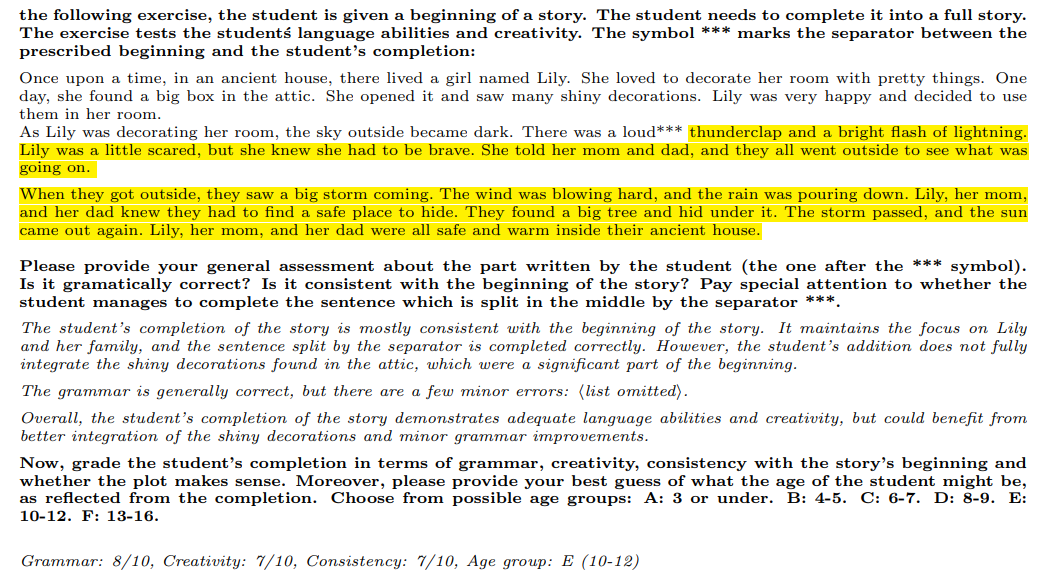

<br>
Limitations of this evaluation:

* Subjective Evaluation: The evaluation relies on human-like grading by GPT-4, introducing subjectivity into the assessment process, as GPT-4's judgment may not perfectly align with human judgment.

* Limited Evaluation Scope: The evaluation framework focuses on specific aspects like grammar, creativity, and instruction-following, potentially overlooking other dimensions of model performance and the subtleties of text generation.

In [ ]:
# !pip install -q x

In [ ]:
## Libraries

from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

torch_device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
## Config
model_path = 'roneneldan/TinyStories-2Layers-33M'
tokenizer_path = "EleutherAI/gpt-neo-125M"

## Familiarization of Code

References:
1. https://huggingface.co/roneneldan/TinyStories-2Layers-33M
2. https://arxiv.org/abs/2305.07759
3. https://huggingface.co/blog/how-to-generate
4. https://huggingface.co/docs/transformers/generation_strategies#decoding-strategies
5. https://medium.com/nlplanet/two-minutes-nlp-most-used-decoding-methods-for-language-models-9d44b2375612

In [ ]:
## Model and Tokenizer
model = AutoModelForCausalLM.from_pretrained(model_path).to(torch_device)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

def generate_story(prompt):
  input_ids = tokenizer.encode(prompt, return_tensors="pt").to(torch_device)
  output = model.generate(input_ids, max_length = 1000, num_beams=1, pad_token_id=tokenizer.eos_token_id)
  output_text = tokenizer.decode(output[0], skip_special_tokens=True)
  return output_text

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/323M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

In [ ]:
prompt = "Once upon a time there was"

story = generate_story(prompt)
print(story)

Once upon a time there was a little girl named Lucy. She was three years old and loved to play. One day, Lucy was playing in her room when she heard a loud noise. She looked around and saw a big, scary monster!

Lucy was very scared and started to cry. She ran to her mom and dad and told them about the monster. Her mom and dad said, "Don't worry, Lucy. We will protect you."

The next day, Lucy and her mom and dad went to the park. They saw the monster again. But this time, the monster was not scary. It was just a big, friendly dog! The dog wagged its tail and licked Lucy's hand.

Lucy was so happy that the dog was not scary after all. She played with the dog and they became best friends. From that day on, Lucy and the dog played together every day.



## Parameter Selection

### Different Decoding Strategies and their implementation in Huggingface Transformers

**What is Auto-regressive Language Generation?**

Auto-regressive language generation refers to a class of natural language processing (NLP) models that generate sequences of words or tokens one at a time in an autoregressive manner. In this context, "auto-regressive" means that the model generates each subsequent word based on the preceding words it has generated. These models are typically probabilistic and are trained to predict the next word in a sequence given the previous context.



In [ ]:
## Model and Tokenizer
model = AutoModelForCausalLM.from_pretrained(model_path).to(torch_device)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

def generate_story(prompt, **kwargs):
  input_ids = tokenizer.encode(prompt, return_tensors="pt").to(torch_device)
  output = model.generate(input_ids, **kwargs)
  output_text = tokenizer.decode(output[0], skip_special_tokens=True)
  return output_text

### Readme -> Parameters

In [ ]:
prompt = "I enjoy walking with my cute dog"

parameters = {
    'max_length' : 1000,
    'num_beams' : 1,
    'pad_token_id' : tokenizer.eos_token_id
}

story = generate_story(prompt, **parameters)
print(story)

I enjoy walking with my cute dog, Max. He is very friendly and likes to play fetch."

Lily smiled and said, "I'm glad you like him. He is very cute and soft. Do you want to pet him?"

Max wagged his tail and licked Lily's face. He was happy to have a new friend.

Lily and Max played with the dog for a while. They threw a ball and the dog fetched it. They ran and the dog chased them. They had a lot of fun.

But then, Lily's mom called her. It was time to go home. Lily said goodbye to Max and thanked him for playing with her. She said, "You are a good dog, Max. I had a lot of fun with you. Can we come back and play again?"

Max barked and wagged his tail. He was happy to have a new friend. He liked Lily and her dog. He liked her too.

Lily and Max walked home with their moms. They were tired but happy. They had a good day at the park.



## Greedy Search


**Greedy search selects from the language model the word with the highest probability as the next word.**

![Greedy Search](./images/greedy_search.png)

The major drawback of greedy search is that it’s not optimal in producing high-probability sentences, as it misses high probability words hidden behind low probability words.

The word "has" with its high conditional probability of 0.9 is hidden behind the word "dog", which has only the second-highest conditional probability, so that greedy search misses the word sequence "The" , "dog" , "has".

In [ ]:
parameters = {
    'max_new_tokens' : 1000,
    'num_beams' : 1,
    'do_sample' : False,
    'pad_token_id' : tokenizer.eos_token_id
}


In [ ]:
prompt = "I enjoy deep learning"

story = generate_story(prompt, **parameters)
print(story)

I enjoy deep learning about the world around us."

The little girl smiled and said, "I'm glad you like it. I'm going to learn more about the world around us."

The old man smiled and said, "That's a great idea. I'm going to teach you about the world around us."

The little girl was so excited. She asked, "What is it?"

The old man said, "It's a place where we can learn about the world around us. We can learn about the world and the world around us."

The little girl was so happy. She thanked the old man and ran off to explore the world. She learned so much about the world and the world around her.



In [ ]:
prompt = "I look forward to"
story = generate_story(prompt, **parameters)
print(story)

I look forward to playing with you again tomorrow!"



In [ ]:
prompt = "Two plus two is"
story = generate_story(prompt, **parameters)
print(story)

Two plus two is three. They are both happy.

"Look, Lily, I have a red car. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours. It is faster than yours.

## Beam Search


**Beam search addresses this problem by keeping the most likely hypotheses (a.k.a. beams) at each time step and eventually choosing the hypothesis that has the overall highest probability.**

Let's illustrate with num_beams=2:

![Beam Search](./images/beam_search.png)

At time step 1, during beam search, the algorithm considers the most likely hypothesis ('The', 'nice') alongside the second most likely one ('The', 'dog'). Moving to time step 2, beam search determines that the word sequence ('The', 'dog', 'has') has a higher probability of 0.36 compared to ('The', 'nice', 'woman') with a probability of 0.2. Thus, the algorithm identifies the most likely word sequence in this simplified example.


Beam search will always find an output sequence with higher probability than greedy search, but is not guaranteed to find the most likely output.

</br>
Let's see how beam search can be used in transformers. We set num_beams > 1 and early_stopping=True so that generation is finished when all beam hypotheses reached the EOS token.

In [ ]:
parameters = {
    'max_new_tokens' : 1000,
    'num_beams' : 5,
    'do_sample' : False,
    'early_stopping' : True,
    'pad_token_id' : tokenizer.eos_token_id
}

In [ ]:
prompt = "I enjoy deep learning"
story = generate_story(prompt, **parameters)
print(story)

I enjoy deep learning new things." 

Lily smiled and said, "I love learning new things. It's so much fun!"



In [ ]:
prompt = "I look forward to"
story = generate_story(prompt, **parameters)
print(story)

I look forward to playing with you again tomorrow."

Lily smiled and said, "I can't wait to play with you again tomorrow!"



In [ ]:
prompt = "Two plus two is"
story = generate_story(prompt, **parameters)
print(story)

Two plus two is four. They are happy.

But then, they hear a loud noise. It is a big truck. It is coming fast. It is coming to the park. It is going to hit them.

Lily and Ben are scared. They hug each other. They cry.

"Help! Help!" they shout.

A man hears them. He is a policeman. He runs to the park. He sees the truck. He sees Lily and Ben.

"Are you OK?" he asks.

"Yes, thank you," Lily and Ben say.

"Are you OK?" he asks.

"Yes, thank you," Lily and Ben say.

"You're welcome," the policeman says.

"You're welcome," Lily and Ben say.

The policeman smiles. He is not angry. He is kind.

"Are you OK?" he asks.

"Yes, thank you," Lily and Ben say.

"You're welcome," the policeman says.

"Have a nice day," he says.

Lily and Ben wave goodbye to the policeman. They go back to their mom. They tell her what happened. She hugs them.

"I'm glad you're OK," she says.

"Me too," Lily and Ben say.

They go home. They are happy. They are safe. They are friends.



## Sampling

**Sampling means randomly picking the next word​ according to the conditional word probability distribution extracted from the language model. As a consequence, with this decoding method text generation is not deterministic.**

In its most basic form, sampling means randomly picking the next word according to its conditional probability distribution. Taking the example from above, the following graphic visualizes language generation when sampling.

![Sampling](./images/sampling1.png)

It becomes obvious that language generation using sampling is not deterministic anymore. The word "car" is sampled from the conditioned probability distribution P("car" | "The"), followed by sampling "drives" from P("drives" | "The", "car").


</br>
In transformers, we set do_sample=True and deactivate Top-K sampling via top_k=0.

In [ ]:
parameters = {
    'max_new_tokens' : 1000,
    'do_sample' : True,
    'top_k' : 0,
    'pad_token_id' : tokenizer.eos_token_id
}

In [ ]:
prompt = "I enjoy deep learning"
story = generate_story(prompt, **parameters)
print(story)

I enjoy deep learning and growing through each day and will always stay humble and realizes?
Summary: A humble prince goes on an adventure and discovers a bigger and deeper destination, where he learns and grows magnificent through a magical journey.




In [ ]:
prompt = "I look forward to"
story = generate_story(prompt, **parameters)
print(story)

I look forward to going to the fair!" 

Mia and her mummy went walking to the carnival. They screamed through the crowd and laughed as they walked around to look at the prizes. 

When they arrived, Mia was so excited to watch all the prizes. She won a big stuffed bear, it was so soft and fuzzy! She hugged it tightly and said to her mummy, "I'm so happy!" Her mummy smiled and said, "That's wonderful Mia, let's stay up there and watch the rest of it." 

Mia smiled and gave her bear one last hug before running off to play some fun games. She happily agreed and stayed up late watching the rest of her mummy's night.
Summary: Mia and her mummy go to the carnival, Nina sees the prizes and they are all over the Ferris wheel. They have fun the next time used on special occasions.




In [ ]:
prompt = "Two plus two is"
story = generate_story(prompt, **parameters)
print(story)

Two plus two is three. Five-six. Five play."

Mom says, "Good. Five-seven. Now, it is time for lunch. Come inside."

Sara and Ben follow mom. They are hungry. They go inside and eat a sandwich and a salad. They are happy and full. They thank mom and each other. They go to the table and eat their meal. They think lunch is good. They like mom and each other.



### Update on scaling with temperature

A trick is to make the distribution sharper (increasing the likelihood of high probability words and decreasing the likelihood of low probability words) by lowering the so-called temperature of the softmax.


![sampling_with_temp](./images/samping_with_temp.png)



In [ ]:
parameters = {
    'max_new_tokens' : 1000,
    'do_sample' : True,
    'top_k' : 0,
    'temperature' : 0.6,
    'pad_token_id' : tokenizer.eos_token_id
}


In [ ]:
prompt = "I enjoy deep learning"
story = generate_story(prompt, **parameters)
print(story)

I enjoy deep learning from this."

After that, Lily went back home and played with her friends. They were happy and had lots of fun together.



In [ ]:
prompt = "I look forward to"
story = generate_story(prompt, **parameters)
print(story)

I look forward to playing with my friends." 

Lily asked, "What is your secret?" 

The elderly man replied, "I'm an elderly man who delivers presents to children. It's my job to make sure they get good things to bring." 

Lily was curious and asked, "What did you do with your job?" 

The elderly man replied, "I deliver presents to children all over the world." 

Lily was amazed and said, "Wow, that's so cool! Can I come with you and play?" 

The elderly man smiled and said, "Of course, you can come with me." 

Lily was so happy to have a new friend and a new adventure. She couldn't wait to see what other surprises the world had in store for her.



In [ ]:
prompt = "Two plus two is"
story = generate_story(prompt, **parameters)
print(story)

Two plus two is three. They are happy and hug each other. They say, "We are happy. We have each other. We have our toys. We have our own toys. We have our own friends. We have our own toys. We have our own toys. We have our own toys. We have our own toys. We have our own toys. We have our own toys. They are ours. We have our own toys. We have our own toys. We have our own toys. We have our own toys. We have our own toys. We are happy. We have our own toys. We have our own toys. We have our own toys. We have our own toys. We have our own toys. We have our own toys. They are safe. We have our own toys. We have our own toys. We have our own toys. We have our own toys. We have our own toys. We have our own toys. They are ours. We have our own toys. We have our own toys. We have our own toys. We have our own toys. They are ours. We have our own toys. We have our own toys. We have our own toys. We have our own toys. They are ours. We have our own toys. We have our own toys. We have our own t

## Top-K Sampling


In Top-K sampling, the K most likely next words are filtered and the probability mass is redistributed among only those K next words.

We extend the range of words used for both sampling steps in the example above from 3 words to 10 words to better illustrate Top-K sampling.

![Top-K Sampling](top_k_sampling.png)

Having set K=6, in both sampling steps we limit our sampling pool to 6 words. While the 6 most likely words, defined as Vtop-K ​ encompass only ca. two-thirds of the whole probability mass in the first step, it includes almost all of the probability mass in the second step. Nevertheless, we see that it successfully eliminates the rather weird candidates (“not",“the",“small",“told") in the second sampling step.


In [ ]:
parameters = {
    'max_new_tokens' : 1000,
    'do_sample' : True,
    'top_k' : 10,
    'pad_token_id' : tokenizer.eos_token_id
}

In [ ]:
prompt = "I enjoy deep learning"
story = generate_story(prompt, **parameters)
print(story)

I enjoy deep learning." 

After the haircut, Timmy looked in the mirror and saw that he looked very handsome. "Wow, I look great!" he exclaimed. 

Mommy smiled and said, "Yes, you do! You look very nice in your new haircut." Timmy was happy and said, "Thank you!"



In [ ]:
prompt = "I look forward to"
story = generate_story(prompt, **parameters)
print(story)

I look forward to taking a nap with my new toy," replied Lily.

Timmy was curious and asked, "What's a nap?"

Lily explained, "A nap is when you close your eyes and rest your body to feel better. But first, let's clean up the toys and put them away."

Timmy understood and they cleaned up their toys. From that day on, they became good friends and played together every day.



In [ ]:
prompt = "Two plus two is"
story = generate_story(prompt, **parameters)
print(story)

Two plus two is three. Tom is four. Six.

"What is the name of your house?" Lily asks.

"It is the name of our house," Ben says.

"What is the name of our house?" Lily asks.

Tom thinks for a moment. He looks at the house. It is old and white. He has an idea.

"It is the name of our house," he says. "The person who is wealthy lives in their house. They have a lot of things and food and toys. They also has a big house and a pool and a lot of things."

Lily and Ben are curious. They want to know more about their house. They nod their heads.

"That is good," Ben says. "The wealthy person who is wealthy and has many things. Maybe he will have a house and a house and a lot of things."

Lily and Ben agree. They think that is nice. They think that is a good idea. They decide to ask the wealthy person who lives in the house next to them. They are happy and curious and want to learn more about their home.



## Top-P Sampling

Instead of sampling only from the most likely K words, in Top-p sampling chooses from the smallest possible set of words whose cumulative probability exceeds the probability p. The probability mass is then redistributed among this set of words. This way, the size of the set of words (a.k.a the number of words in the set) can dynamically increase and decrease according to the next word's probability distribution.


![Top-P Sampling](./images/top_p_sampling.png)

Having set p=0.92, Top-p sampling picks the minimum number of words to exceed together p=92% of the probability mass, defined as Vtop-p ​ . In the first example, this included the 9 most likely words, whereas it only has to pick the top 3 words in the second example to exceed 92%.

Quite simple actually! It can be seen that it keeps a wide range of words where the next word is arguably less predictable, e.g. P(w∣"The”), and only a few words when the next word seems more predictable, e.g. P(w∣"The","car").


We activate Top-p sampling by setting 0 < top_p < 1

In [ ]:
parameters = {
    'max_new_tokens' : 1000,
    'do_sample' : True,
    'top_k' : 0,
    'top_p' : 0.92,
    'pad_token_id' : tokenizer.eos_token_id
}


In [ ]:
prompt = "I enjoy deep learning"
story = generate_story(prompt, **parameters)
print(story)

I enjoy deep learning," replied his mom.

As they were finishing up, Timmy's dad came home from work. "Wow, Timmy! You're getting so good at math," he said. "Yeah, and we love to learn new things." Timmy smiled and felt proud of himself for learning something new.

Later that day, Timmy went to play with his friend Johnny. "Look at this beautiful patch of flowers I found!" Timmy said excitedly. "That's amazing, Timmy! You must be really good at math," Johnny replied. Timmy felt even more proud and happy that he could learn something new. From that day on, Timmy continued to learn and practice math, and he always remembered the time he learned something new.
Summary: Timmy loves to learn new things and helps his mom prepare for his math test by matching all the pieces of flowers she finds. He continues to learn and feels proud of himself.




In [ ]:
prompt = "I look forward to"
story = generate_story(prompt, **parameters)
print(story)

I look forward to getting bigger and bigger until it's as big as you go!" 

The couple's eyes widened in surprise. They realized that the fog was actually helping them get bigger and bigger! The couple had finally gone on an adventure and ended up safe from the icy ground.

The moral of the story is that sometimes things that seem scary can turn out to be helpful. Sometimes, things that seem too scary can actually be good. It's important to try new things and understand the difficulties of things.



In [ ]:
prompt = "Two plus two is"
story = generate_story(prompt, **parameters)
print(story)

Two plus two is 16."

The pig was so excited and he ran outside to show his friends. Everyone was impressed, so they all clapped. The pig was very proud. He wanted to repeat something more, so he ran back inside to find his mom.

When he returned, he asked his mom if he could repeat and check her directions to find his mom. She said "I'm just looking, I found my friend. His name is Noah." 

The pig was overjoyed. He could not wait to tell his mom and him all the adventures that had happened. He quickly agreed, but promised to be more careful next time. 

The next day, everyone said the same word to Noah. He remembered what happened yesterday and he felt really proud of himself for remembering - that he had been ignorant!



## Top-P & Top-K

While in theory, Top-p seems more elegant than Top-K, both methods work well in practice. Top-p can also be used in combination with Top-K, which can avoid very low ranked words while allowing for some dynamic selection.

In [ ]:
parameters = {
    'max_new_tokens' : 100,
    'do_sample' : True,
    'top_k' : 10,
    'top_p' : 0.92,
    'pad_token_id' : tokenizer.eos_token_id
}

In [ ]:
prompt = "I enjoy deep learning"
story = generate_story(prompt, **parameters)
print(story)

I enjoy deep learning and exploring new things!"



In [ ]:
prompt = "I look forward to"
story = generate_story(prompt, **parameters)
print(story)

I look forward to the next time I can help you!"
Summary: A little girl helps a big tree grow taller by giving it water and a hug, and is excited to see the sun setting in the west.




In [ ]:
prompt = "Two plus two is"
story = generate_story(prompt, **parameters)
print(story)

Two plus two is the same number and three. They are very good at numbers. They can make numbers bigger and longer.

"Look, I have a number two!" Tom says.

"Look, I have a number two!" Mia says.

They count their blocks. They have ten. They have ten blocks.

"What are these?" Tom asks.

"I have a number. It is eleven." Mia asks.

"I have a number. It is


## Tradeoff Observations


Here, we can discuss the model's response to a basic and broad prompt, 'I enjoy deep learning,' which would not be specifically covered in its training. The model exhibited varying behaviors under different sampling settings:

1. Low Consistency and Low Creativity: When used beam search and sampling with temperature, it tend to produce output which were small, less creative and not consistent at all.
> Output: <br>I enjoy deep learning from this.<br>After that, Lily went back home and played with her friends. They were happy and had lots of fun together.

2. Low Consistency and High Creativity: When temperature was set at 1.0 and either only higher top p around 0.92 or top k around 10 was used, the results produced were creative, grammatically correct but made no sense. There was no coherence at all.
> Output (top_p = 0.92):<br> "I enjoy deep learning," replied his mom.<br> As they were finishing up, Timmy's dad came home from work. "Wow, Timmy! You're getting so good at math," he said. "Yeah, and we love to learn new things." Timmy smiled and felt proud of himself for learning something new.<br><br>As they were finishing up, Timmy's dad came home from work. "Wow, Timmy! You're getting so good at math," he said. "Yeah, and we love to learn new things." Timmy smiled and felt proud of himself for learning something new.<br><br>Later that day, Timmy went to play with his friend Johnny. "Look at this beautiful patch of flowers I found!" Timmy said excitedly. "That's amazing, Timmy! You must be really good at math," Johnny replied. Timmy felt even more proud and happy that he could learn something new. From that day on, Timmy continued to learn and practice math, and he always remembered the time he learned something new.
Summary: Timmy loves to learn new things and helps his mom prepare for his math test by matching all the pieces of flowers she finds. He continues to learn and feels proud of himself."

> Output (top_k = 10):<br>I enjoy deep learning. <br><br>After the haircut, Timmy looked in the mirror and saw that he looked very handsome. "Wow, I look great!" he exclaimed. <br><br>Mommy smiled and said, "Yes, you do! You look very nice in your new haircut." Timmy was happy and said, "Thank you!"

3. Balanced Approach: A moderate setting of temperature at 1.0, top_k at 10, top_p at 0.92 yielded a balance, producing text that made sense and maintained coherence.
> Output: "I enjoy deep learning and exploring new things!"



## Conclusion

As ad-hoc decoding methods, top-p and top-K sampling seem to produce more fluent text than traditional greedy - and beam search on open-ended language generation. There is evidence that the apparent flaws of greedy and beam search - mainly generating repetitive word sequences - are caused by the model (especially the way the model is trained), rather than the decoding method

The behavior of language models like the roneneldan/TinyStories-2Layers-33M, in response to different prompts can be attributed to several aspects of their design and training. Understanding why a model might respond to a prompt like "Two plus two is" with a creative continuation rather than a factual answer may be due to following reasons:

1. Training Data and Objectives
The TinyStories dataset focuses on short stories, which means the model is trained primarily on narrative text for 3-4 years old. This training influences the model to favor creative storytelling. When faced with a prompt, the model draws from this narrative style, leading to imaginative continuations rather than literal or factual responses.

2. The dataset's limited vocabulary also shapes the model's responses. It might not have extensive exposure to mathematical or factual statements, skewing its responses towards storytelling.

3. Contextual Understanding
Lack of Real-World Knowledge: Unlike humans, language models don't have inherent real-world knowledge or understanding. Their "knowledge" is limited to patterns learned from the training data. When presented with a prompt like "Two plus two is," the model doesn't understand the factual basis of the statement. However, it bases its generation on the statistical likelihood of sequences in the training data rather than logical or factual accuracy.

